# Работа 3. Классификация. Логистическая регрессия.

**План занятия**

* [Теоретическая часть](#theory)
    * [Линейная классификация](#lin)
        * [Функционал ошибки в линейной классификации](#error)
    * [Логистическая регрессия](#logreg)
        * [Метод максимального правдоподобия](#mle)
        * [Реализация логистической регрессии](#implement_logreg)
    * [Оценка качества классификации](#metrics)
* [Практическая часть](#practice)
    * [Домашнее задание](#hw)

## <center>Теоретическая часть<a class="anchor" id="theory"></a><center>

## Линейная классификация<a class='anchor' id='lin'>

Пусть $\mathbb{X} = \mathbb{R}^d$ пространство объектов.

$\mathbb{Y} = \{-1, +1\}$ - множество допустимых ответов. 
 * Если $y = +1$ - положительный объект
 * $y = -1$ - отрицательный объект.

$X = \{(x_i, y_i)\}_{i = 1}^{\ell}$ - обучающая выборка.

Линейная модель имеет следующий вид: 

$\large a(x) = sign (\langle w, x \rangle + w_0)$

Уравнение $\langle w, x \rangle + w_0 = 0$ определяет гиперплоскость у которой $w$ - это вектор нормали и все точки $x$, которые ему ортогональны лежат на этой гиперплоскости, то есть, определяют гиперплоскость. Соответственно, если точка лежит на гиперплоскости, тогда скалярное произведение будет равно нулю и классификатор отказывается от классификации.

Следовательно, знак скалярного произведения означет с какой стороны от гипрплоскости расположен объект:

 * Если $\langle w, x \rangle + w_0 = 0$ тогда точка лежит на гиперплоскости;
 * Если $\langle w, x \rangle + w_0 < 0$ тогда точка лежит на одной из полуплоскостей;
 * Если $\langle w, x \rangle + w_0 > 0$ тогда точка лежит на второй полуплоскости.

Абсолютная величина скалярного произведения имеет смысл расстояния до разделяющей гиперплоскости. Если объект расположен близко к разделяющей гипперплоскости, тогда небольшое изменение параметров модели может привести к другим ответам на объктах, значит уверенность классификации низкая.

<img src="log_reg.png">

Как и в случае регрессии, в классификации можно использовать линейные модели. Это называется _линейной классификацией._ Линейные классификаторы устроены похожим на линейную регрессию образом, за одним лишь различием - для получения бинарных значений берется только знак от значения $a(x)$:

$$a(x) = \text{sign}\left (w_{0}+\sum^{d}_{i=1}w_{i}x^{i} \right ).$$

Аналогично линейной регрессии, после добавления константного признака формула имеет вид

$$\text{sign} \left ( \sum^{d+1}_{i=1}w_{i}x^{i} \right ) = \text{sign} \left ( \left \langle w,x \right \rangle \right ).$$

Множество точек $\left \langle w,x \right \rangle = 0$ образует _гиперплоскость_ в пространстве признаков и делит его на две части. Объекты, расположенние по разные стороны от нее, относятся к разным классам.


In [ ]:
|⟨𝑤,𝑥⟩| =

<img src="log_reg_m.png">

<h2 style="color:#008B8B">1.1 Обучение линейных классификаторов</h2>

Функционал ошибки будет выглядеть следующим образом:

$\large Q(a, X) = \frac{1}{\ell} \sum\limits_{i=1}^{\ell} [a(x_i) = y_i]$ - доля правильных ответов (accuracy)

Нам будет удобнее решать задачу минимизации, поэтому будем вместо этого использовать долю неправильных ответов:

$\large Q(a, X) = \frac{1}{\ell} \sum\limits_{i=1}^{\ell} [a(x_i) \ne y_i]$ - доля ошибок

Если не сказано иначе, мы будем считать, что среди признаков есть константа, $x_{d + 1} = 1$. В этом случае нет необходимости вводить сдвиг $w_0$, и линейный классификатор можно задавать как

$\large a(x) = sign (\langle w, x \rangle)$

Подставим в функцию потерь модель:

$\large Q(a, X) = \frac{1}{\ell} \sum\limits_{i=1}^{\ell} [sign (\langle w, x_i \rangle) \ne y_i] \to \underset{w}{\text{min}}$

**Как оптимизировать функционал?**

Как мы решаем задачи оптимизации? Можем найти точное решение посчитав градиент или использовать градиентный спуск, где в двух случаях необходимо посчитать частные производные функционала по вектору весов. Но, веса расположены под знаком $sign$, который не является дифференцируемой функцией и всё это расположено внутри идникатора, который тоже не является дифференцируемой функцией.

**Выполним преобразование функционала ошибки**

$\large Q(a, X) = \frac{1}{\ell} \sum\limits_{i=1}^{\ell} [y_i \langle w, x_i \rangle < 0] \to \underset{w}{\text{min}}$

Утвержается, что стоит под индекатором $sign (\langle w, x_i \rangle) \ne y_i$ эквивалентно $y_i \langle w, x_i \rangle < 0$.

$\large y_i \langle w, x_i \rangle > 0$ означает, что $y_i$ и $\langle w, x_i \rangle$ одного знака, а если они одного знака, тогда мы правильно угадали класс. Значит, ответ верный.

$\large y_i \langle w, x \rangle < 0$ в данном случае, значение слева меньше нуля, значит $y_i$ и $\langle w, x_i \rangle$ разного знака. Значит, ответ неверный.

### Отступы

$\large Q(a, X) = \frac{1}{\ell} \sum\limits_{i = 1}^{\ell} [\underbrace{y_i \langle w, x_i \rangle}_{M_i} < 0] \to \underset{w}{\text{min}}$

$\large M_i = y_i \langle w, x_i \rangle$ - отступ (margin)

Знак отступа говорит о корректности ответа классификатора. Положительный отступ соответствует правильному ответу, так как $y_i$ и $\langle w, x_i \rangle$ одного знака, а отрицательный отступ соответсвует неправильному ответу.

Абсолютное значение отступа $|M_i|$ это расстояние от $x_i$ до разделяющей гиперплоскости. Если $L_2$ норма вектора весов равна $1$, тогда отступ является расстоянием до разделяющей гиперплоскости. Если $L_2$ норма вектора весов не равна $1$, тогда это отмасштабированное расстояние. Но по идеии, чем больше значение отступа, тем больше расстояние до разделяющей гиперплоскости, значит и уверенность классификатора в своём ответе будет выше.

Если модель уверенна в своём ответе на некотором объекте и она ошиблась, тогда объект скорее всего является выбросом.

In [ ]:
+ + = +
- - = +
+ - = -
- + = -

$$M_i = y_i(\langle w,x \rangle)$$

$M_i > 0$ - классификатор дает верный ответ<br>
$M_i < 0$ - классификатор ошибается<br>
Чем дальше отступ от нуля, тем классификатор больше уверен в своём ответе

### Функционал ошибки в линейной классификации<a class='anchor' id='error'>

Функция, стоящая под знаком суммы, называется _функцией потерь_. 

$\large Q(a, X) = \frac{1}{\ell} \sum\limits_{i=1}^{\ell} [y_i \langle w, x_i \rangle < 0]$

В данном функционале используется следующая функция потерь:

$\large L(M) = [M < 0]$

Посмторим как данная функция потерь выглядит на графике (синий цвет). Видим, что слева ошибка стоставит 1 и функция потерь за это штрафует одинаково, а справа функция потреь не штрафует, даже при малой уверенности модели:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
def loss_function(x):
    return 0 if x > 0 else 1

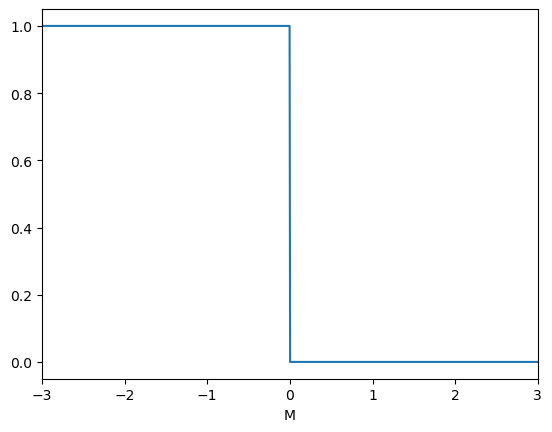

In [4]:
dots = np.linspace(-3, 3, 1000)
q_zero_one_loss = [loss_function(x) for x in dots]

plt.xlabel('M')
plt.xlim(-3, 3)
plt.plot(dots, q_zero_one_loss);

Мы можем ввести верхнюю оценку для пороговой функции потерь, чтобы производить обучение модели.

$\large L(M) = [M < 0] \le \tilde L(M)$

После этого можно получить верхнюю оценку на функционал:

$\large 0 \le \frac{1}{\ell} \sum\limits_{i=1}^{\ell} [y_i \langle w, x_i \rangle < 0] 
\le 
 \frac{1}{\ell} \sum\limits_{i=1}^{\ell} \tilde L (y_i \langle w, x_i \rangle) \to \underset{w}{\text{min}}$

И после этого, отсаётся минимизировать верхнюю оценку. Так как изначальный функционал ошибки не меньше нуля и при этом мы минимизруем верхнюю оценку, тогда и доля неправильных ответов тоже станет небольшой. Тем самым, при минимизации верхней оценки она будет маленькой и придавит долю ошибок к нулю.

Примерами могут быть:

- _экспоненциальная функция потерь_ $\tilde{L}(M_{i}) = \text{exp}(- M_{i})$


- _логистическая функция потерь_ $\tilde{L}(M_{i}) = \text{log}(1 + \text{exp}(- M_{i}))$


- и др. (см. доп. материалы)

Реализуем их и построим соответствующие графики.

In [5]:
def exp_loss_func(x):
    return np.exp(-x)

In [6]:
def logistic_loss(x):
    return np.log2(1 + np.exp(-x))

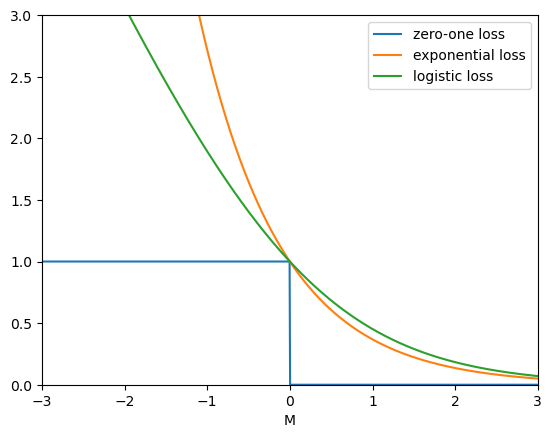

In [7]:
q_exp_loss = [exp_loss_func(x) for x in dots]
q_logistic_loss = [logistic_loss(x) for x in dots]

plt.xlabel('M')
plt.xlim(-3, 3)
plt.ylim(0, 3)
plt.plot(dots, q_zero_one_loss)
plt.plot(dots, q_exp_loss)
plt.plot(dots, q_logistic_loss)
plt.legend(['zero-one loss', 'exponential loss', 'logistic loss']);

Все они оценивают функцию потерь сверху и при этом хорошо оптимизируются.

<h1 style="color:#008B8B">1. Логистическая регрессия</h1>


## Для чего необходимо оценивать вероятность?

Предположим, имеется модель $\text{b(x)} \in [0, 1]$. Представим, что модель выдала на некотором объекте веротяность равную $0.8$ в классе +1. 

**Как это можно интерпретировать?**

Например, если взять все множество объектов, где модель возвращает одну веренность в своём прогнозе, тогда мы ожидаем, что среди этих объектов 80% будут положительными.

**Что если одного класса будет меньше?**

Тогда модель должна сгруппировать положительные объекты в одной области пространства и отделит область от отрицательного касса, где для положительного класса модель будет выдавать одно число, например, 0.9, а для отрицательного класса другое число. Фактически, у нас будет два множества, может и больше, где модель будет возвращать свою вероятность прогноза для каждой области.

Предположим, мы построили модель, кторая оценивает вероятность положительного класса. Записывать это будем следующим образом:

$\large b(x) \approx p(y = +1 | x)$ - модель оценивает вероятность того, что класс положительный для данного объекта $x$. Оценивание веротяности принадлежности объекта к некоторому классу позволяет посмотреть уверенность модели в своём прогнозе.

**Проблема обучения?**

$\large \frac{1}{\ell} \sum\limits_{i=1}^{\ell} {(\langle w, x_i \rangle - y_i)^2} \to \underset{w}{\text{min}}$, где $y \in \{0, 1\}$

## Логистическая регрессия<a class='anchor' id='logreg'>

_Логистическая регрессия_ - частный случай линейного классификатора, обладающий одной полезной особенностью - помимо отнесения объекта к определенному классу она умеет прогнозировать вероятность $P$ того, что объект относится к этому классу.

Во многих задачах такая особенность является очень важной. Например, в задачах кредитного скоринга (предсказание, вернет клиент кредит или нет) прогнозируют вероятность невозврата кредита и на основании нее принимают решение о выдаче или невыдаче.

Пусть в каждой точке пространства объектов $\mathbb{X}$ задана вероятность того, что объект $x$ будет принадлежать к классу "+1" $P(y=1|x)$ (условная вероятность $y = 1$ при условии $x$). Она будет принимать значения от 0 до 1, и нам нужно каким-то образом ее предсказывать, но пока мы умеем только строить прогноз методами линейной регрессии с помощью некоего алгоритма $b(x)=\left \langle w,x_{i} \right \rangle$. У него есть проблема, связанная с тем, что скалярное произведение $\left \langle w,x_{i} \right \rangle$ не всегда возвращает значения в отрезке [0, 1]. Чтобы достичь такого условия, можно использовать некую функцию $\sigma:\mathbb{R} \rightarrow [0,1]$, которая будет переводить полученное в скалярном произведении значение в вероятность, пределы которой будут лежать в промежутке от 0 до 1. В модели логистической регрессии в качестве такой функции берется сигмоида, которая имеет вид:

$$\sigma(z) = \frac{1}{1 + exp(-z)}.$$

Изобразим ее график.

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

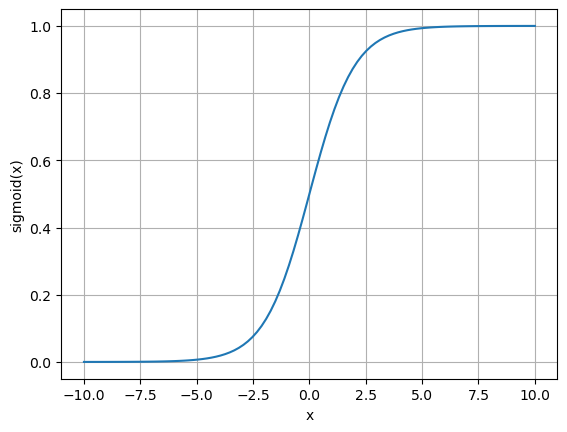

In [9]:
dots = np.linspace(-10, 10, 100)
sigmoid_value = list(map(sigmoid, dots))

plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid()
plt.plot(dots, sigmoid_value);

$$\sigma(z) = \frac{1}{(1 + exp(-z))^{-1}} = \frac{1}{1 + \frac{1}{exp(z)}} = \frac{exp(z)}{exp(z) + 1}$$

$$\sigma(z) = \frac{exp(z)}{1 + exp(z)}.$$

In [10]:
def sigmoid_2(x):
    return np.exp(x) / (1 + np.exp(x))

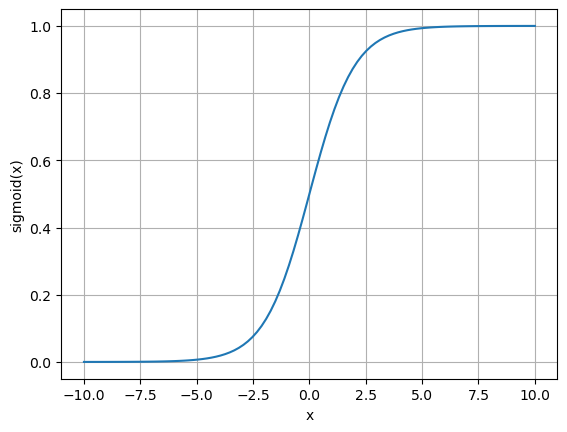

In [11]:
dots = np.linspace(-10, 10, 100)
sigmoid_value_2 = list(map(sigmoid_2, dots))

plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid()
plt.plot(dots, sigmoid_value_2);

При использовании такой функции $\tilde{b}(x_{i}) = \sigma(\left \langle w,x_{i} \right \rangle)$ получаем, что вероятность отнесения объекта к классу "+1" $P(y=1|x)$, которую для краткости обозначим $p_{+}$, будет равняться

$$p_{+} = \sigma(\left \langle w,x_{i} \right \rangle) = \frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)},$$

Чем больше будет скалярное произведение $\left \langle w,x_{i} \right \rangle$, тем выше будет предсказанная вероятность.

In [12]:
np.exp(-10000)

0.0

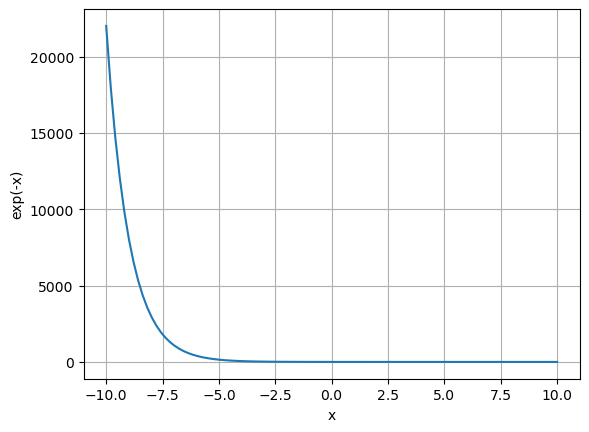

In [13]:
dots = np.linspace(-10, 10, 100)
exp_value = list(map(lambda x: np.exp(-x), dots))

plt.xlabel('x')
plt.ylabel('exp(-x)')
plt.grid()
plt.plot(dots, exp_value);

### Функционал для квадрата ошибки и сигмойда

Мы проверили, что квадарт ошибки $(y - b)^2$ обладает нужным свойством, поэтому его можно использовать для обучения классификатора который оцениват уверенность. Толко должно принадлежать $b \in \{0, 1\}$, если взять $b(x) = \langle w, x \rangle$ равное скалярному произведению, тогда не сходистя, ведь скалярное произведение возвращает любое вещественное число, для решения это проблемы можно придумать преобразование скалярного приозведения чтобы оно переводило вещественно число в отрезок от 0 до 1. Мы будем использовать для этого сигмойду:

$\large \sigma (z) = \frac{1}{1 + e^{-z}}$

Тогда обучать линейный классификатор будем на следующем функционале:

$\large \frac{1}{\ell} \sum\limits_{i=1}^{\ell} (\sigma (\langle w, x_i \rangle) - y_i)^2 \to \underset{w}{\text{min}}$

Вот мы записали модель, которая будет оценивать верояность.

**Чем плохой этот функционал?**

### Метод максимального правдоподобия <a class='anchor' id='mle'>

<img src='maximum_likelihood.png'>

Далее для обучения этой модели нам потребуется использовать _метод максимального правдоподобия_ (см. доп. материалы). Его сущность заключается в выборе гипотезы, при которой вероятность получить имеющееся наблюдение максимальна.

С точки зрения реализуемого алгоритма вероятность того, что в выборке встретится объект $x_{i}$ c классом $y_{i}$, равна

$$\large P(y=y_{i}|x_{i}) = p_{+}^{[y_{i}=+1]}(1-p_{+})^{[y_{i}=-1]}.$$

Исходя из этого, правдоподобие выборки (т.е. вероятность получить такую выборку с точки зрения алгоритма) будет равняться произведению вероятностей получения каждого имеющегося ответа:

$$\large P(y|X) = L(X) = \prod^{l}_{i=1} p_{+}^{[y_{i}=+1]}(1-p_{+})^{[y_{i}=-1]}.$$


Правдоподобие можно использовать как функционал для обучения алгоритма, однако, удобнее взять от него логарифм, так как в этом случае произведение превратится в сумму, а сумму гораздо проще оптимизировать. Также, в отличие от рассмотренных ранее функций потерь, правдоподобие требуется максимизировать для обучения алгоритма, а не минимизировать. Поэтому для большего удобства перед правдоподобием ставят минус, поскольку функции потери в задачах регрессии принято минимизировать. В итоге получим:

$$\large \text{ln}\prod^{l}_{i=1} p_{+}^{[y_{i}=+1]}(1-p_{+})^{[y_{i}=-1]} = $$
$$\large  = \sum^{l}_{i=1} \text{ln}(p_{+}^{[y_{i}=+1]}(1-p_{+})^{[y_{i}=-1]})$$

$$\large -\text{ln}L(X) = -\sum^{l}_{i=1}([y_{i} = +1] \text{ln}p_{+}) + [y_{i} = -1]\text{ln}(1 - p_{+}))).$$


Данная функция потерь называется _логарифмической функцией потерь (log loss)_ или _кросс-энтропией_.

В случае, когда имеются классы 1 и -1:

$$ p_{+} = \sigma({\langle w,x \rangle})$$
$$ p_{-} = \sigma(- {\langle w,x \rangle})$$

$$ p = \sigma(y{\langle w,x \rangle})$$

$$ -\text{ln}L = - \sum^{l}_{i=1} \text{ln}(p_{+}^{[y_{i}=+1]}(1-p_{+})^{[y_{i}=-1]}) = $$
$$ = - \sum^{l}_{i=1} \text{ln}(\sigma(y{\langle w,x \rangle})) = - \sum^{l}_{i=1} \text{ln}(\frac{1}{1 + exp(-y{\langle w,x \rangle}})$$
$$ = \sum^{l}_{i=1} \text{ln}(1 + exp(-y{\langle w,x \rangle})$$

То есть в случае логистической регрессии обучение сводится к минимизации этого функционала.

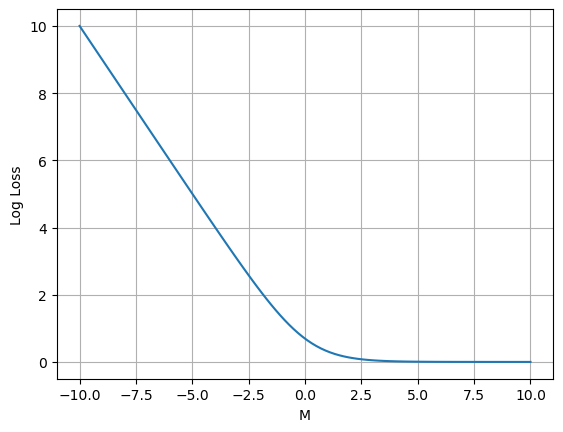

In [14]:
dots = np.linspace(-10, 10, 100)
log_loss_value = list(map(lambda x: - np.log(1 / (1 + np.exp(-x))), dots))
# log_loss_value = list(map(lambda x: np.log(1 + np.exp(-x)), dots))

plt.xlabel('M')
plt.ylabel('Log Loss')
plt.grid()
plt.plot(dots, log_loss_value);

В общем виде log loss запишется как

$$-\text{ln}L(X) = -\sum^{l}_{i=1} (y_{i} \text{ln}\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)} + (1 - y_{i})\text{ln} (1-\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)})).$$

$$-\text{ln}L(X) = -\sum^{l}_{i=1} (y_{i} \text{ln}(\sigma) + (1 - y_{i})\text{ln} (1-\sigma)).$$



### Производные

<center><i>Сигмоида</i></center>

$$\sigma(z) = \frac{1}{1 + exp(-z)}$$

$$\frac{d\sigma(z)}{dz} = -\frac{1}{(1 + exp(-z))^2}(-exp(-z)) = \frac{exp(-z)}{(1 + exp(-z))^2} \text{(*)} = \frac{1}{1 + exp(-z)}(1-\frac{1}{1 + exp(-z)}) = \sigma(1-\sigma)$$

$ (*)\frac{exp(-z) +1-1}{(1 + exp(-z))^2} = \frac{1 + exp(-z) -1}{(1 + exp(-z))^2}= \frac{1 + exp(-z)}{(1 + exp(-z))^2} - \frac{1}{(1 + exp(-z))^2}=$

$ = \frac{1}{(1 + exp(-z))} - \frac{1}{(1 + exp(-z))}\frac{1}{(1 + exp(-z))} = \frac{1}{(1 + exp(-z))}(1- \frac{1}{(1 + exp(-z))}) $

<center><i>Логлосс</i></center>

$$\frac{dL}{dw} = -\sum^{l}_{i=1} (\frac{y_{i}} {\sigma} - \frac{1 - y_{i}} {1 - \sigma})\frac{d\sigma(z)}{dz} = -\sum^{l}_{i=1} \frac{(1 - \sigma)y_{i} - \sigma(1 - y_{i})} {\sigma(1 - \sigma)}\frac{d\sigma(z)}{dz} = -\sum^{l}_{i=1} \frac{(y_{i} - \sigma y_{i} - \sigma + \sigma y_{i})} {\sigma(1 - \sigma)}\frac{d\sigma(z)}{dz}$$

$$ = -\sum^{l}_{i=1} \frac{y_{i} - \sigma} {\sigma(1 - \sigma)}\frac{d\sigma(z)}{dz} = -\sum^{l}_{i=1} \frac{y_{i} - \sigma} {\sigma(1 - \sigma)}\sigma(1 - \sigma) = \sum^{l}_{i=1}( \sigma - y_{i}) = \frac{1}{1 + exp(-\langle w,X\rangle)} - Y = X^{T}(\sigma-Y)$$


$$\frac{d\langle w,x\rangle}{dw} = \frac{d Xw}{dw} = X^T$$


### Реализация логистической регрессии<a class='anchor' id='implement_logreg'>

Напишем алгоритм логистической регрессии.

In [15]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

# сгеренируем данные с помощью sklearn.datasets
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2,
                                    n_redundant=0, n_classes=2, random_state=1)
X, y = datasets.make_blobs(centers=2, cluster_std=2.5, random_state=12)
X, y

(array([[-14.78528446,   6.13883366],
        [ -7.7478137 ,  -0.27907424],
        [ -3.60647661,  -0.92873668],
        [ -2.82012436,   0.60350067],
        [ -3.57716481,   5.59765715],
        [ -4.73682285,   1.18509532],
        [ -8.28689194,  -2.23418297],
        [ -7.25039042,   0.79984227],
        [ -4.38545446,   2.51632106],
        [-10.73920685,   7.37402187],
        [ -6.37930328,   3.84009692],
        [ -3.24392817,  -4.41486722],
        [ -8.07023049,   4.29758825],
        [ -2.34469136,   2.29849007],
        [ -6.51861994,  -0.72992379],
        [ -8.25794631,   5.29579522],
        [ -8.08262091,   5.69155145],
        [ -6.23576555,   2.37805268],
        [ -8.63893988,   6.80757006],
        [ -6.51727391,   3.01033496],
        [ -7.53380246,   2.89752439],
        [ -6.33551705,   6.97002381],
        [ -6.24293781,   1.5932701 ],
        [ -1.31906741,   3.75490005],
        [ -5.46325832,   2.51015699],
        [ -4.63955979,   0.05929487],
        [ -8

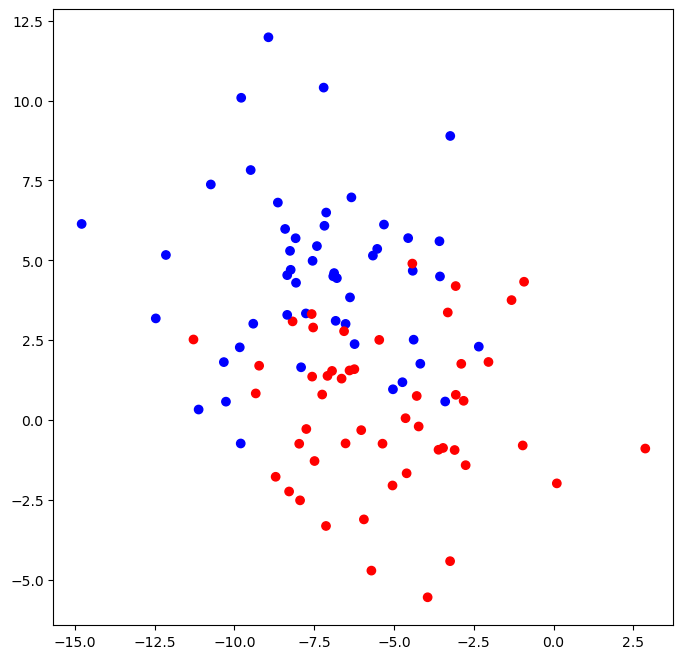

In [16]:
# и изобразим их на графике
colors = ListedColormap(['blue', 'red'])

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors);

Далее разделим выборку на обучающую и тестовую. При реальной работе, если нет специфических требований по сохранению порядка выборки, ее полезно перемешивать, так как данные в ней могут быть каким-либо образом отсортированы. Это может негативно сказаться на процессе обучения.

In [17]:
np.random.permutation(X.shape[0])

array([ 5, 43, 71, 36, 23, 77, 84, 39, 40, 45, 34,  7,  6, 38, 76, 73, 31,
       96, 94, 98, 16, 15, 89, 27, 17,  4, 26, 10, 54, 51, 62, 67,  1, 95,
       13, 57, 88, 21, 44, 74, 20, 14, 12, 55, 25,  9, 48, 52, 75, 90, 19,
        8, 56, 79, 24, 37, 97, 83, 78, 87, 66, 80, 47, 33, 63, 81, 30, 42,
       70, 29, 58, 69, 82, 28, 68, 86, 50,  3, 46, 49, 60, 92, 65, 99, 35,
       11, 61, 91, 32, 72, 64, 59, 22, 53, 93,  2, 18, 85,  0, 41])

In [18]:
# перемешивание датасета
np.random.seed(12)
shuffle_index = np.random.permutation(X.shape[0])
X_shuffled, y_shuffled = X[shuffle_index], y[shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(X) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]
    
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (70, 2)
Размер массива признаков тестовой выборки (30, 2)
Размер массива ответов для обучающей выборки (70,)
Размер массива ответов для тестовой выборки (30,)


Реализуем функцию потерь log loss с одновременным расчетом градиента.

Оптимизировать функционал ошибки будем с помощью градиентного спуска, его вид в случае использования такой функции потерь будет:

$$w_{n+1} = w_{n} - \eta \frac{1}{l}X^{T}(A-Y),$$

где $A=\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)}.$

$$L(X) = -\sum^{l}_{i=1} (y_{i} \text{ln}(\sigma) + (1 - y_{i})\text{ln} (1-\sigma)).$$
$$L(X) = \sum^{l}_{i=1} \text{ln}(1 + exp(-y{\langle w,x \rangle})$$

In [19]:
def log_loss(w, X, y):
    m = X.shape[0]
    # используем функцию сигмоиды, написанную ранее
    A = sigmoid(np.dot(X, w))
        
    # labels 0, 1
    loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    
    # labels -1, 1
#     temp_y = np.where(y == 1, 1, -1)
#     loss = 1.0 / m * np.sum(np.log(1 + np.exp(-temp_y * np.dot(X, w))))

    grad = 1.0 / m * X.T @ (A - y)

    return loss, grad

Реализуем градиентный спуск

In [20]:
def optimize(w, X, y, n_iterations, eta):
    # потери будем записывать в список для отображения в виде графика
    losses = []
    
    for i in range(n_iterations):        
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad

        losses.append(loss)
        
    return w, losses

и функцию для выполнения предсказаний

In [21]:
def predict(w, X):
    
    m = X.shape[0]
    
    y_predicted = np.zeros(m)

    A = np.squeeze(sigmoid(np.dot(X, w)))

    # За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[0]):
        if (A[i] > 0.5): 
            y_predicted[i] = 1
        elif (A[i] <= 0.5):
            y_predicted[i] = 0

    return y_predicted

In [22]:
# иницилизируем начальный вектор весов
w0 = np.zeros(X_train.shape[1])

n_iterations = 1000
eta = 0.05

w, losses = optimize(w0, X_train, y_train, n_iterations, eta)

y_predicted_test = predict(w, X_test)
y_predicted_train = predict(w, X_train)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = np.mean(y_predicted_train == y_train) * 100.0
test_accuracy = np.mean(y_predicted_test == y_test) * 100.0

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [-0.20238792 -0.61534395]
Точность на обучающей выборке: 78.571
Точность на тестовой выборке: 70.000


Покажем, как менялась при этом функция потерь.

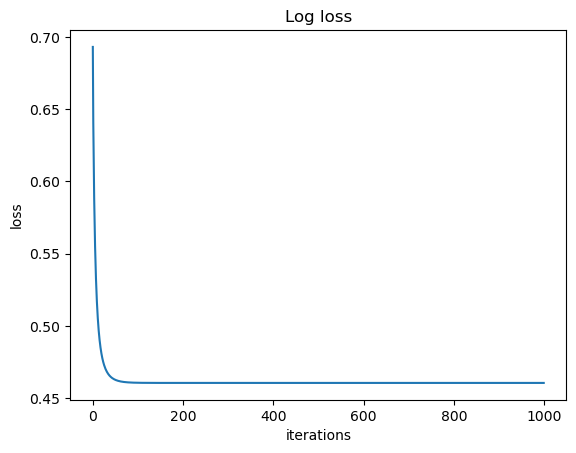

In [23]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses);

[Визуализация](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py) логистической регрессии

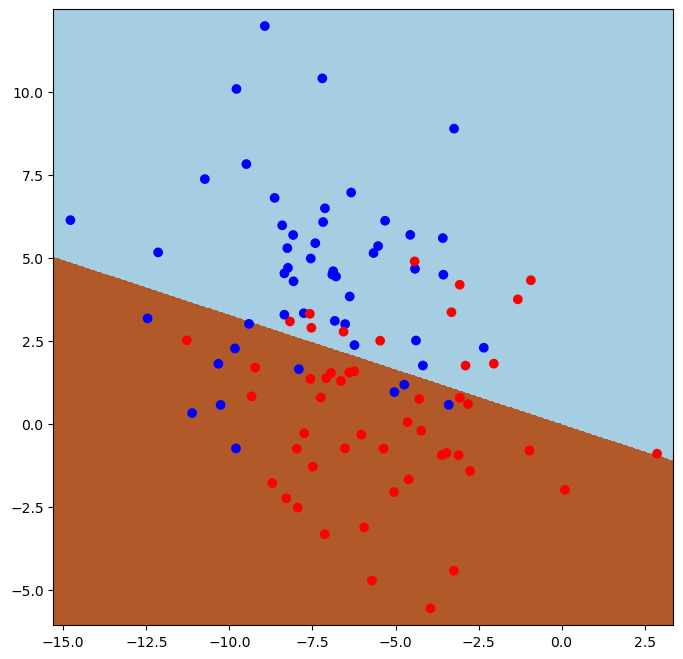

In [24]:
plt.figure(figsize=(8, 8))

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = predict(w, np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors);

## Оценка качества классификации <a class='anchor' id='metrics'>

Как и в случае линейной регрессии, в задачах классификации требуется оценивать качество обученной модели. Для этого существует большое количество подходов.

Наиболее очевидным и простым способом является расчет *доли правильных ответов*:

$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}].$$

**Проблемы accuracy:**<br>
    
    1) Дисбаланс классов
    
    кот - 950 наблюдений
    голубь - 50 наблюдений
    a(x) = кот

    accuracy?

    2) Ошибки могут иметь разную цену
<img src='images/scoring.png' width=400px>

### Матрица ошибок

Удобно представлять ответы в виде комбинации истинного ответа и ответа алгоритма. При этом получается так называемая _матрица ошибок_.

|  <empty>   | $$y = +1$$ | $$y = -1$$ |
--- | --- | ---
| __$$a(x) = +1$$__  |  True Positive TP    |  False Positive  FP   |
| __$$a(x) = -1$$__ |   False Negative FN    |   True Negative TN   |

В матрице сверху отложены истинные ответы, слева - ответы алгоритма. Когда алгоритм относит объект к классу "+1", говорят, что он *срабатывает*, а когда к "-1", - *пропускает*. Если алгоритм сработал (дал положительный ответ) и объект действительно относится к классу "+1", говорят, что имеет место верное срабатывание/верный положительный ответ (True Positive, TP), а если объект не относится к классу "+1", это ложное срабатывание (False Positive, FP). Если алгоритм пропускает объект, а его истинный класс "+1", это ложный пропуск/ложный негативные ответ (False Negative, FN), а если истинный класс объекта "-1", имеет место истинный пропуск (True Negative, TN). При такой классификации уже есть два вида ошибок - ложные срабатывания и ложные пропуски. По главной диагонали в матрице ошибок располагаются верные ответы, по побочной - неверные.

### Точность и полнота

В классификации часто используются две метрики - _точность_ и _полнота_.

Точность (precision) представляет из себя долю истинных срабатываний от общего количества срабатываний. Она показывает, насколько можно доверять алгоритму классификации в случае срабатывания

$$precision(a, X) = \frac{TP}{TP+FP}.$$

Полнота (recall) считается как доля объектов, истинно относящихся к классу "+1", которые алгоритм отнес к этому классу

$$recall(a, X) = \frac{TP}{TP+FN},$$

здесь $TP+FN$ как раз будут вместе составлять весь список объектов класса "+1".

<img src='prec_vs_recall.png'>

__Пример__

Пусть у нас есть выборка из 100 объектов, из которых 50 относится к классу "+1" и 50 к классу "-1" и для этой работы с этой выборкой мы рассматриваем две модели: $a_{1}(x)$ с матрицей ошибок

|  <empty>   | $$y = +1$$ | $$y = -1$$ |
--- | --- | ---
| __$$a_{1}(x) = +1$$__  |   40    |   10   |
| __$$a_{1}(x) = -1$$__ |   10    |   40   |
    

и $a_{2}(x)$ с матрицей ошибок:
 
 
|  <empty>   | $$y = +1$$ | $$y = -1$$ |
--- | --- | ---
| __$$a_{2}(x) = +1$$__  |   22    |   2   |
| __$$a_{2}(x) = -1$$__ |   28    |   48   |

Для первого алгоритма 

$$preсision(a_{1}, X)=0.8$$
$$recall(a_{1}, X)=0.8$$

Для второго алгоритма

$$preсision(a_{2}, X)=0.92$$
$$recall(a_{2}, X)=0.44$$

Как мы видим, точность второй модели очень высока, но при этом сильно снижена полнота. Поэтому нужно правильно формировать бизнес-требования к модели, какой именно показатель должен быть определяющим. Например, если в задаче кредитного скоринга банк ставит цель возврата 90% кредитов, задачей ставится максимизация полноты при условии точности не ниже 0.9. А если при распознавании спама стоит требование, например, распознавать 95% спам-писем, задача состоит в максимизации точности при условии полноты не ниже 0.95.

Однако, такое ограничение есть не всегда, и в остальных случаях требуется максимизировать и полноту и точность. Есть различные варианты объединения их в одну метрику, одним из наиболее удобных из них является *F-мера*, которая представляет собой среднее гармоническое между точностью и полнотой

$$F = \frac{2 \cdot precision \cdot recall }{ presision + recall}.$$

В отличие от, например, среднего арифметического, если хотя бы один из аргументов близок к нулю, то и среднее гармоническое будет близко к нулю. По сути, F-мера является сглаженной версией минимума из точности и полноты (см. графики).

<h2 style="color:#008B8B">2.3 Объединение точности и полноты</h2>

<!-- ## Объединение точности и полноты -->

Основная проблема $\text{precision}$ и $\text{recall}$ заключается в том, что у нас две оценки модели, возникает желание объеденить $\text{precision}$ и $\text{recall}$, чтобы получить еденый показатель, который бы отражал $\text{precision}$ и $\text{recall}$.

### Арифметическое среднее

|                    |$\text{Model 1}$   |$\text{Model 2}$   |
|:------------------:|:-----------------:|:-----------------:|
|$\text{precision}$  |$0.1$              |$0.55$             |        
|$\text{recall}$     |$1$                |$0.55$             |

$\large A = \frac{1}{2} (precision + recall)$

$\large \text{A(Model 1)} = 0.55$

$\large \text{A(Model 2)} = 0.55$

Несмторя на то, что вторая модель лучше первой (так как первая модель константная - на всех объектах предсказывает один класс), среднее арифметическое имеет одно значение. Можем заметить, что эти два алгоритма расположены на одной линии уровня.

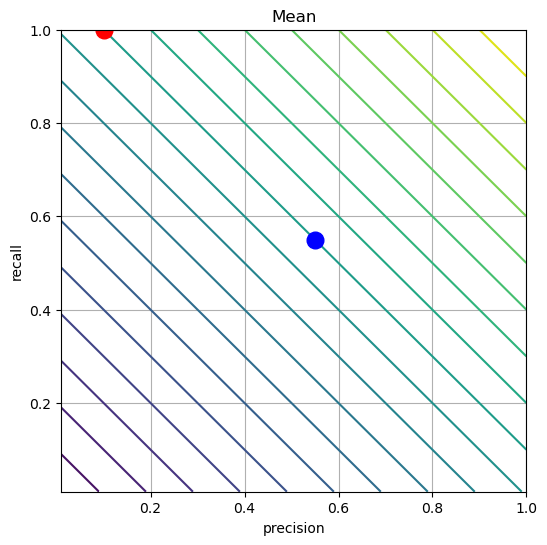

In [25]:
precisions, recalls = np.meshgrid(np.linspace(0.01, 1, 100), np.linspace(0.01, 1, 100))

mean_levels = np.empty_like(precisions)
for i in range(precisions.shape[0]):
    for j in range(precisions.shape[1]):
        mean_levels[i, j] = 1/2 * (precisions[i, j] + recalls[i, j])
        
plt.figure(figsize=(6, 6))
plt.title('Mean')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid()
plt.contour(precisions, recalls, mean_levels, levels=20)
plt.plot(0.1, 1, 'ro', ms=12)
plt.plot(0.55, 0.55, 'bo', ms=12);

|  <empty>   | red | blue |
--- | --- | ---
| precision  |   0.1    |   0.55   |
| recall |   1    |   0.55   |
| mean |   0.55    |   0.55   |

### Минимум

$\large \text{MIN} = min(precision, recall)$ 

Подход с взятием минимума решает проблему для модели выше. Но у этой модели имеетсся другая проблема. Предположим у нас есть две модели:

|                    |$\text{Model 1}$     |$\text{Model 2}$   |
|:------------------:|:-------------------:|:-----------------:|
|$\text{precision}$  |$0.4$                |$0.4$              |        
|$\text{recall}$     |$0.5$                |$0.9$              |

У двух моделей точность равна $0.4$, но полнота первой модели $0.5$, а второй модели $0.9$. И несложно понять, что второй алгоритм лучше. Но минимум у двух моделей будет равен $0.4$.

Если начинает возрастать второй парамтр, тогда оцнка не сможет использовать эту информацию. Это хорошо видно на линиях уровня, если зафиксировать один параметр и увеличивать другой, то линия уровня будет прямой.

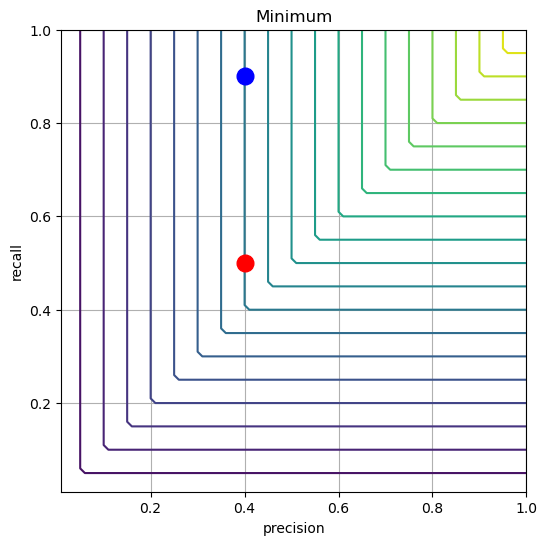

In [26]:
precisions, recalls = np.meshgrid(np.linspace(0.01, 1, 100), np.linspace(0.01, 1, 100))

min_levels = np.empty_like(precisions)
for i in range(precisions.shape[0]):
    for j in range(precisions.shape[1]):
        min_levels[i, j] = min([precisions[i, j], recalls[i, j]])
        
plt.figure(figsize=(6, 6))
plt.title('Minimum')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid()
plt.contour(precisions, recalls, min_levels, levels=20)
plt.plot(0.4, 0.5, 'ro', ms=12)
plt.plot(0.4, 0.9, 'bo', ms=12)
# plt.plot(0.4, 0.9, 'go', ms=12);

|  <empty>   | red | blue | green|
--- | --- | --- |---
| precision  |   0.1    |   0.4   | 0.4|
| recall |   1    |   0.4   | 0.9 |
| min |   0.1   |   0.4   | 0.4|

### F-Мера

Решением данной проблемы становится метрика гармонического среднего:

$\large F = \frac{2 \cdot \text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}$

$\text{Model}_1 = 0.44$

$\text{Model}_2 = 0.55$

Как видно, вторая модель лучше. Вторая точка будет расположена вверхнем углу на салатовой линии уровня. Если мы зафиксируем, напрмер, $\text{precision}$ и будем увеличивать $\text{recall}$, тогда F-мера будет увеличиваться, так как мы будем переходить на более высокие линии уровня, а не оставаться на одном как это было с арифметическим средним или минимумом.

Имеется модификация F-меры, которая позволят выбрать что важнее, точность или полнота:

$\large F_{\beta} = (1 + \beta^2) \frac{\text{precision} \cdot \text{recall}}{\beta^2 \text{precision} + \text{recall}}$

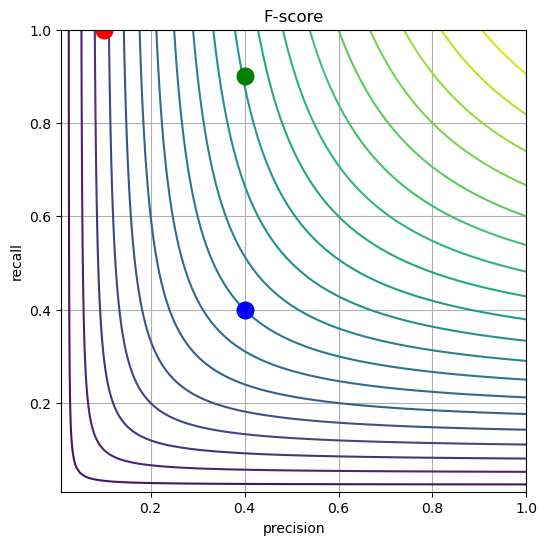

In [27]:
f_levels = np.empty_like(precisions)
for i in range(precisions.shape[0]):
    for j in range(precisions.shape[1]):
        f_levels[i, j] = 2 * precisions[i, j] * recalls[i, j] / (precisions[i, j] + recalls[i, j])

plt.figure(figsize=(6, 6))        
plt.title('F-score')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid()
plt.contour(precisions, recalls, f_levels, levels=20)
plt.plot(0.1, 1, 'ro', ms=12)
plt.plot(0.4, 0.4, 'bo', ms=12)
plt.plot(0.4, 0.9, 'go', ms=12);

|  <empty>   | red | blue | green|
--- | --- | --- |---
| precision  |   0.1    |   0.4   | 0.4|
| recall |   1    |   0.4   | 0.9 |
| f-score |   0.1818   |   0.4   | 0.55|

Существует также усовершенствованная версия F-меры $F_{\beta}$:

$$F_{\beta} = (1 + \beta^{2}) \frac{precision \cdot recall}{\beta^{2} \cdot precision + recall}.$$

Параметр $\beta$ здесь определяет вес точности в метрике. При $\beta = 1$ это среднее гармоническое, умноженное на 2 (чтобы в случае $precision = 1$ и $recall = 1$ $F_{1} = 1$). Его изменение требуется, когда необходимо отдать приоритет точности или полноте, как это было показано в примерах ранее. Чтобы важнее была полнота, $\beta$ должно быть больше 1, чтобы важнее была точность - меньше.

## <center>Практическая часть<a class="anchor" id="practice"></a><center>

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype=np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=np.float64)

In [30]:
X

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [31]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [32]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [33]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])

In [34]:
X_st

array([[ 1.        ,  1.        , -0.97958969,  1.        ],
       [ 1.        ,  1.        , -0.56713087,  1.        ],
       [ 1.        ,  2.        , -0.46401617,  2.        ],
       [ 1.        ,  5.        , -0.77336028,  1.        ],
       [ 1.        ,  3.        ,  0.97958969,  2.        ],
       [ 1.        ,  0.        , -0.36090146,  1.        ],
       [ 1.        ,  5.        ,  1.08270439,  3.        ],
       [ 1.        , 10.        ,  2.11385144,  3.        ],
       [ 1.        ,  1.        , -1.08270439,  1.        ],
       [ 1.        ,  2.        ,  0.05155735,  2.        ]])

In [35]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [36]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.999, 0.01])
calc_logloss(y1, y_pred1)

0.005525418093542492

In [37]:
# Плохой пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([1, 0.2])
calc_logloss(y1, y_pred1)

C:\Users\winnr\AppData\Local\Temp\ipykernel_4216\851670199.py:2: RuntimeWarning: divide by zero encountered in log
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
C:\Users\winnr\AppData\Local\Temp\ipykernel_4216\851670199.py:2: RuntimeWarning: invalid value encountered in multiply
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))


nan

In [38]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [39]:
z = np.linspace(-10, 10, 101)

In [40]:
probabilities = sigmoid(z)

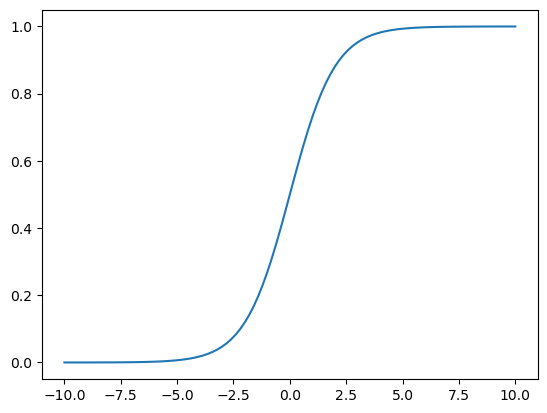

In [41]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [42]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [43]:
W = eval_model(X_st, y, iterations=500, eta=1e-4)

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
50 [ 0.494784   -0.14564801  0.6475462   1.52014828] 1.1657985749255426
100 [ 0.49290109 -0.15285535  0.64740132  1.51733474] 1.1531112685708473
150 [ 0.49102761 -0.16003088  0.64725118  1.51453281] 1.1405352753305018
200 [ 0.48916364 -0.16717404  0.64709581  1.51174267] 1.1280719326917483
250 [ 0.48730929 -0.17428428  0.64693524  1.50896452] 1.1157225565960736
300 [ 0.48546465 -0.18136107  0.64676951  1.50619853] 1.103488442622439
350 [ 0.48362982 -0.18840385  0.64659868  1.5034449 ] 1.0913708674192037
400 [ 0.48180488 -0.19541206  0.64642281  1.50070383] 1.0793710903721336
450 [ 0.47998993 -0.20238516  0.64624195  1.49797551] 1.0674903554915993


## Домашнее задание <a class='anchor' id='hw'>

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [51]:
def calc_logloss(y, y_pred):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

Наша функция calc_logloss использует логарифмическую функцию, которая не определена для нуля. Чтобы избежать этой проблемы, можно добавить небольшую константу к y_pred и 1.0 - y_pred перед применением np.log.

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.


In [63]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

W = eval_model(X_st, y, iterations=1000, eta=1e-3)

0 [ 0.49633477 -0.13971518  0.64766116  1.52246371] 1.1785958344356262
100 [ 0.46038628 -0.27784345  0.64391879  1.46838117] 0.9449083796207038
200 [ 0.42880798 -0.398758    0.63895621  1.42057357] 0.76478635339061
300 [ 0.40211124 -0.49592634  0.63495855  1.38143191] 0.6465819250979652
400 [ 0.3802473  -0.56578851  0.63387547  1.35226238] 0.5834626177311397
500 [ 0.36227303 -0.61296537  0.6357139   1.33157192] 0.5531388819143023
600 [ 0.34705426 -0.6447563   0.63955258  1.31689489] 0.5381879835818275
700 [ 0.33375348 -0.66658248  0.64461446  1.30632368] 0.5301812678912075
800 [ 0.32182152 -0.6818318   0.65041019  1.29860717] 0.5254538963664757
900 [ 0.31089651 -0.69260819  0.65664232  1.29292959] 0.5223650188440195


3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).


In [71]:
def calc_pred_proba(W, X):
    z = np.dot(X, W)
    y_pred_proba = sigmoid(z)
    return y_pred_proba

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [79]:
def calc_pred(W, X, threshold=0.5):
    y_pred_proba = calc_pred_proba(W, X)
    y_pred = np.where(y_pred_proba > threshold, 1, 0)
    return y_pred

В этой функции мы сначала вычисляем предсказанные вероятности с помощью функции calc_pred_proba. Затем мы преобразуем эти вероятности в предсказанные классы, используя пороговое значение threshold. Если предсказанная вероятность больше threshold, мы предсказываем класс 1, в противном случае - класс 0.

5. Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.

In [99]:
from sklearn.metrics import confusion_matrix

# Функция для подсчета Accuracy
def calc_accuracy(y, y_pred):
    return np.mean(y == y_pred)

# Функция для подсчета матрицы ошибок
def calc_confusion_matrix(y, y_pred):
    return confusion_matrix(y, y_pred)

# Функция для подсчета точности
def calc_precision(y, y_pred):
    tp, fp, fn, tn = confusion_matrix(y, y_pred).ravel()
    precision = tp / (tp + fp)
    return precision

# Функция для подсчета полноты
def calc_recall(y, y_pred):
    tp, fp, fn, tn = confusion_matrix(y, y_pred).ravel()
    recall = tp / (tp + fn)
    return recall

# Функция для подсчета F1 score
def calc_f1_score(y, y_pred):
    precision = calc_precision(y, y_pred)
    recall = calc_recall(y, y_pred)
    f1_score = 2 * precision * recall / (precision + recall)
    return f1_score

Эти функции принимают на вход истинные значения y и предсказанные значения y_pred. Они вычисляют соответствующие метрики качества классификации и возвращают их. Обратите внимание, что эти функции используют функцию confusion_matrix из библиотеки sklearn.metrics для вычисления матрицы ошибок. Значения TP (True Positive), FP (False Positive), FN (False Negative) и TN (True Negative) извлекаются из этой матрицы для вычисления точности, полноты и F1 score.

## Дополнительные материалы

1. [Функции потерь для классификации](https://en.wikipedia.org/wiki/Loss_functions_for_classification)

2. Метод максимального правдоподобия: [Сложное описание](https://habr.com/ru/company/ods/blog/323890/#metod-maksimalnogo-pravdopodobiya) / [Простое описание](https://www.youtube.com/watch?v=2iRIqkm1mug)

3. [Встроенные датасеты Sklearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

5. [Плейлист про метрики для классификации. Precision, Recall, F-score, PR-AUC, ROC_AUC](https://youtube.com/playlist?list=PLkJJmZ1EJno6CLyvD4DHc32Fed6cPBHje)

##  Summary

* Логистическая регрессия - частный случай линейной классификации - предсказывает вероятность отнесения объекта к основному классу, что зачастую очень важно при интерпретации
* Для "отображения" действительных предсказаний линейной модели в "вероятностный" интервал [0,1] применяют сигмоиду
* Для обучения логистической регрессии используют логарифмическую функцию потерь (log-loss), полученную методом максимального правдоподобия (maximum likelihood estimation)
* Оптимизируем log-loss классическим градиентным спуском, в котором берем градиент log-loss'а
* Основными метриками качества классификатора являются Accuracy, Precision, Recall, ROC-AUC, PR-AUC, F-мера
* Нужно быть внимательным при работе с этими метриками и хорошо понимать, как они работают и как между собой связаны, иначе выводы могут получиться неверными

### Определения
*Масштабирование данных*

**Классификация** — задача, в которой имеется множество объектов, разделённых некоторым образом на классы.

**Линейный классификатор** — алгоритм классификации, основанный на построении линейной разделяющей поверхности.

**Отступ (для классификатора)** — эвристика, оценивающая то, насколько объект принадлежит классу, насколько эталонным представителем он является.
____________
_Логистическая регрессия_

**Логистическая регрессия** — метод построения линейного классификатора, позволяющий оценивать апостериорные вероятности принадлежности объектов классам.

**Риск** – отношение вероятности «положительный эффект» к вероятности «отрицательный эффект».

**Логит** – натуральный логарифм отношения вероятности «положительный эффект» к вероятности «отрицательный эффект».
____________
_Метрики качества классификации_

**Accuracy** – доля правильных ответов.

$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}].$$

**Точность (precision)** – долю истинных срабатываний от общего количества срабатываний.

$$precision(a, X) = \frac{TP}{TP+FP}.$$

**Полнота (recall)** – доля объектов, истинно относящихся к выбранному классу, которые алгоритм отнес к этому классу.

$$recall(a, X) = \frac{TP}{TP+FN},$$

**F-мера** – среднее гармоническое между точностью и полнотой.

$$F_{\beta} = (1 + \beta^{2}) \frac{precision \cdot recall}{\beta^{2} \cdot precision + recall}.$$